In [3]:
!unzip AI_project.zip



Archive:  AI_project.zip
   creating: AI_project/
   creating: AI_project/datasets/
  inflating: AI_project/datasets/Flow_depth_v3.xls  
  inflating: AI_project/datasets/Flow_rate_v3.xls  
  inflating: AI_project/datasets/WW01_edge.csv  
  inflating: AI_project/datasets/WW01_node.csv  
  inflating: AI_project/main.py      
  inflating: AI_project/Outbook_notebook.ipynb  
  inflating: AI_project/Read me.txt  
  inflating: AI_project/requirements.txt  
   creating: AI_project/utils/
  inflating: AI_project/utils/data_preprocessing.py  
  inflating: AI_project/utils/__init__.py  
   creating: AI_project/utils/__pycache__/
  inflating: AI_project/utils/__pycache__/data_preprocessing.cpython-310.pyc  
  inflating: AI_project/utils/__pycache__/visualization.cpython-310.pyc  
  inflating: AI_project/utils/__pycache__/__init__.cpython-310.pyc  


In [ ]:
!cd wastewater-gnn/

In [4]:
# Install required packages
!pip install torch==1.12.1+cpu torchvision==0.13.1+cpu torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cpu
!pip install torch-geometric==2.1.0
!pip install pandas==1.4.2 scikit-learn==1.1.1 matplotlib==3.5.2 numpy==1.21.6 openpyxl==3.0.9 jupyter==1.0.0


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu
ERROR: Could not find a version that satisfies the requirement torch==1.12.1+cpu (from versions: 1.13.0, 1.13.0+cpu, 1.13.1, 1.13.1+cpu, 2.0.0, 2.0.0+cpu, 2.0.1, 2.0.1+cpu, 2.1.0, 2.1.0+cpu, 2.1.1, 2.1.1+cpu, 2.1.2, 2.1.2+cpu, 2.2.0, 2.2.0+cpu, 2.2.1, 2.2.1+cpu, 2.2.2, 2.2.2+cpu, 2.3.0, 2.3.0+cpu, 2.3.1, 2.3.1+cpu, 2.4.0, 2.4.0+cpu, 2.4.1, 2.4.1+cpu, 2.5.0, 2.5.0+cpu, 2.5.1, 2.5.1+cpu, 2.6.0, 2.6.0+cpu)
ERROR: No matching distribution found for torch==1.12.1+cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.5/467.5 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Reason for being yanked: Missing ninja templates
  Created wheel for torch-geometric: filename=torch_geometric-2.1.0-py3-none-any.whl size=687142 sha256=21d32f9374e9f7fd40cce9f3b237f63a5fe124bc85eef38e80eaa0921d5cadd8
  Stored in directory: /root/.cache/pip/wheels/9b/68/8e/fc6b4a08d5aef2f8cb1473a7668c1cc54c254fa88e1c5eac3f
Succ

In [5]:
!pip install torch-sparse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp311-cp311-linux_x86_64.whl size=1127937 sha256=8085e10bd51b47b613c004d5f675df3bc754e3fd02d9fba0df8e071694c01113
  Stored in directory: /root/.cache/pip/wheels/75/e2/1e/299c596063839303657c211f587f05591891cc6cf126d94d21
Successfully built torch-sparse


In [6]:
!pip install torch-scatter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp311-cp311-linux_x86_64.whl size=547368 sha256=656bcf8280f0540f8a837f8f8cede3a7561d8ea8abb123e0d53b164486f8a181
  Stored in directory: /root/.cache/pip/wheels/b8/d4/0e/a80af2465354ea7355a2c153b11af2da739cfcf08b6c0b28e2
Successfully built torch-scatter


Loading and preprocessing data...
Loading node and edge data...
Total nodes in graph: 23 (including outfall)
Processing edge connections...
Graph created with 22 edges
Loading temporal depth and flow data...
Added temporal features: node features shape is now torch.Size([23, 18])
Set target value for OF-1 node to: 0.0
Splitting data into train/test sets...
Edge features dimension: 7
Training Improved GNN for 200 epochs...
Epoch: 10, Loss: 0.048846
Epoch: 20, Loss: 0.077455
Epoch: 30, Loss: 0.041165
Epoch: 40, Loss: 0.032671
Epoch: 50, Loss: 0.039184
Epoch: 60, Loss: 0.042886
Epoch: 70, Loss: 0.026586
Epoch: 80, Loss: 0.019345
Epoch: 90, Loss: 0.014949
Epoch: 100, Loss: 0.017948
Epoch: 110, Loss: 0.011677
Epoch: 120, Loss: 0.014111
Epoch: 130, Loss: 0.006948
Epoch: 140, Loss: 0.007265
Epoch: 150, Loss: 0.005854
Epoch: 160, Loss: 0.010922
Epoch: 170, Loss: 0.011239
Epoch: 180, Loss: 0.006575
Epoch: 190, Loss: 0.009694
Epoch: 200, Loss: 0.004796
Training baseline models...
Evaluating all 

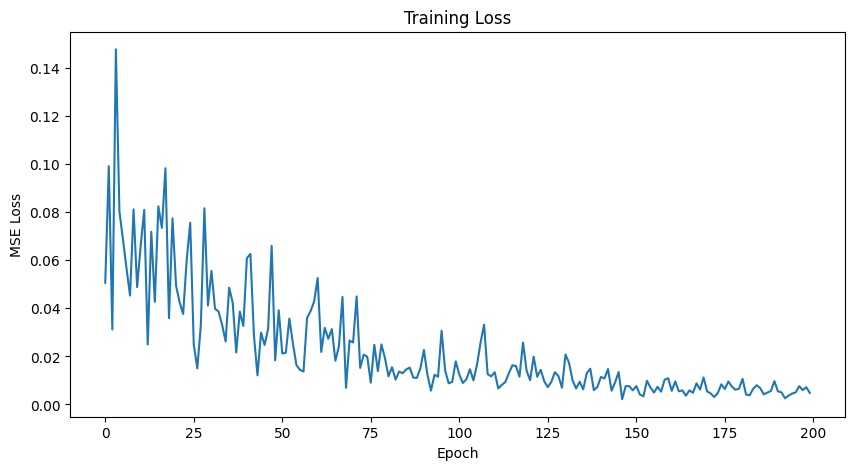

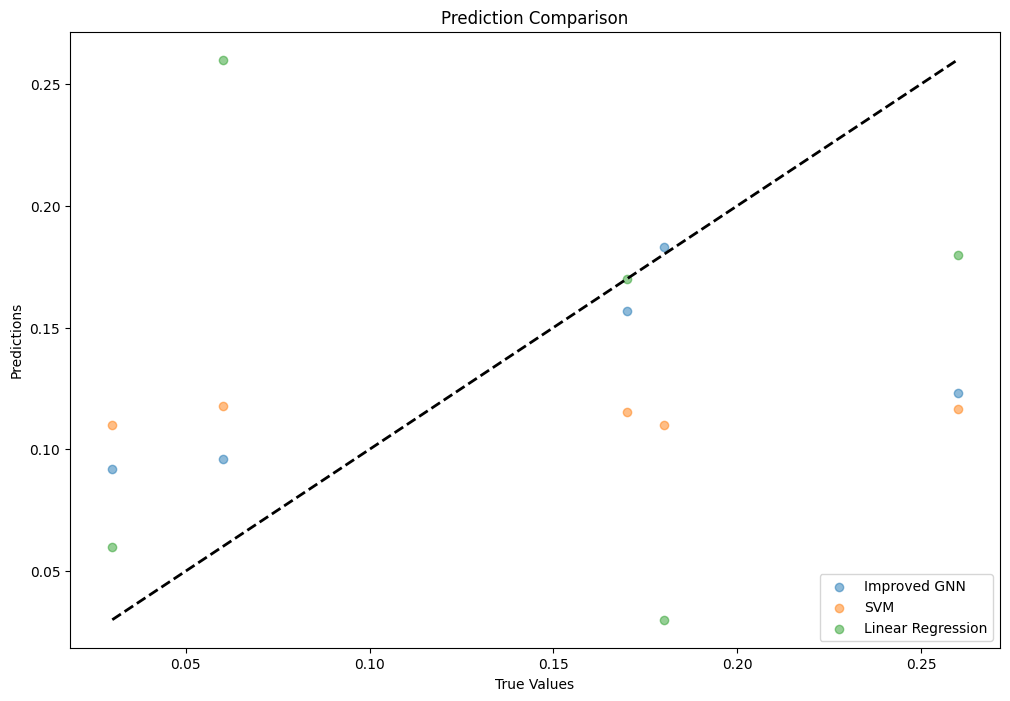

In [9]:

import os
import sys
sys.path.append(os.path.join(os.getcwd(), 'AI_project'))

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import torch.nn.functional as F

from utils.data_preprocessing import load_and_preprocess_data, prepare_baseline_features

from torch_geometric.nn import GATv2Conv, global_mean_pool

# Define the GNN model using GATv2 (enhanced version)
class ImprovedWastewaterGNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, edge_dim, heads=4, dropout=0.4):
        super(ImprovedWastewaterGNN, self).__init__()
        self.conv1 = GATv2Conv(in_channels, hidden_channels, heads=heads, dropout=dropout, edge_dim=edge_dim)
        self.bn1 = torch.nn.BatchNorm1d(hidden_channels * heads)
        self.conv2 = GATv2Conv(hidden_channels * heads, hidden_channels, heads=heads, dropout=dropout, edge_dim=edge_dim)
        self.bn2 = torch.nn.BatchNorm1d(hidden_channels * heads)
        self.dropout = torch.nn.Dropout(dropout)
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(hidden_channels * heads, hidden_channels),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout),
            torch.nn.Linear(hidden_channels, out_channels)
        )

    def forward(self, x, edge_index, edge_attr):
        x = self.conv1(x, edge_index, edge_attr)
        x = self.bn1(x)
        x = F.elu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index, edge_attr)
        x = self.bn2(x)
        x = F.elu(x)
        x = self.dropout(x)
        return self.mlp(x)

# Baseline models (same as your code)
class SVMBaseline:
    def __init__(self):
        self.model = SVR(kernel='rbf', C=10, gamma='scale', epsilon=0.1)
    def train(self, X, y):
        self.model.fit(X, y)
        return self
    def predict(self, X):
        return self.model.predict(X)

class LinearRegressionBaseline:
    def __init__(self):
        self.model = LinearRegression()
    def train(self, X, y):
        self.model.fit(X, y)
        return self
    def predict(self, X):
        return self.model.predict(X)

# Main parameters
NODE_FILE = './AI_project/datasets/WW01_node.csv'
EDGE_FILE = './AI_project/datasets/WW01_edge.csv'
DEPTH_FILE = './AI_project/datasets/Flow_depth_v3.xls'
FLOW_FILE = './AI_project/datasets/Flow_rate_v3.xls'
TARGET_COLUMN = 'Max. Depth (ft)'
EPOCHS = 200
LEARNING_RATE = 0.001
HIDDEN_CHANNELS = 64
HEADS = 4
DROPOUT = 0.4
TEST_SIZE = 0.2
RESULT_DIR = 'results'

os.makedirs(RESULT_DIR, exist_ok=True)

print("Loading and preprocessing data...")
data, node_mapping = load_and_preprocess_data(NODE_FILE, EDGE_FILE, DEPTH_FILE, FLOW_FILE, lookback_hours=24, feature_agg='mean')
orig_node_df = pd.read_csv(NODE_FILE)
node_id_col = [col for col in orig_node_df.columns if "Node ID" in col][0]
targets = np.zeros(data.x.size(0))
for i, node_id in enumerate(orig_node_df[node_id_col]):
    if str(node_id) in node_mapping:
        node_idx = node_mapping[str(node_id)]
        targets[node_idx] = orig_node_df[TARGET_COLUMN].iloc[i]
if 'OF-1' in node_mapping:
    targets[node_mapping['OF-1']] = 0.0
    print("Set target value for OF-1 node to: 0.0")
targets = torch.tensor(targets, dtype=torch.float)

print("Splitting data into train/test sets...")
num_nodes = data.x.size(0)
idx = np.arange(num_nodes)
train_idx, test_idx = train_test_split(idx, test_size=TEST_SIZE, random_state=42)
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)
train_mask[train_idx] = True
test_mask[test_idx] = True

# Initialize improved GNN model
in_channels = data.x.size(1)
out_channels = 1
edge_dim = data.edge_attr.size(1) if hasattr(data, 'edge_attr') and data.edge_attr.dim() > 1 else 1
print(f"Edge features dimension: {edge_dim}")

gnn_model = ImprovedWastewaterGNN(in_channels, HIDDEN_CHANNELS, out_channels, edge_dim, HEADS, DROPOUT)
optimizer = torch.optim.Adam(gnn_model.parameters(), lr=LEARNING_RATE, weight_decay=5e-4)

# Training
print(f"Training Improved GNN for {EPOCHS} epochs...")
gnn_model.train()
losses = []
for epoch in range(EPOCHS):
    optimizer.zero_grad()
    predictions = gnn_model(data.x, data.edge_index, data.edge_attr).squeeze()
    loss = F.mse_loss(predictions[train_mask], targets[train_mask])
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f"Epoch: {epoch+1}, Loss: {loss.item():.6f}")

plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.savefig(os.path.join(RESULT_DIR, 'training_loss_improved.png'))

# Baselines
print("Training baseline models...")
adj_matrix = torch.zeros((num_nodes, num_nodes))
edge_index = data.edge_index.numpy()
for i in range(edge_index.shape[1]):
    adj_matrix[edge_index[0, i], edge_index[1, i]] = 1
X_baseline = prepare_baseline_features(data.x, adj_matrix.numpy())
scaler = StandardScaler()
X_baseline = scaler.fit_transform(X_baseline)
X_train, X_test = X_baseline[train_idx], X_baseline[test_idx]
y_train, y_test = targets[train_idx].numpy(), targets[test_idx].numpy()

svm_model = SVMBaseline().train(X_train, y_train)
svm_preds = svm_model.predict(X_test)
lr_model = LinearRegressionBaseline().train(X_train, y_train)
lr_preds = lr_model.predict(X_test)

print("Evaluating all models...")
gnn_model.eval()
with torch.no_grad():
    gnn_preds = gnn_model(data.x, data.edge_index, data.edge_attr).squeeze()[test_mask].numpy()
    y_true = targets[test_mask].numpy()

gnn_mse = mean_squared_error(y_true, gnn_preds)
gnn_mae = mean_absolute_error(y_true, gnn_preds)
gnn_r2 = r2_score(y_true, gnn_preds)
svm_mse = mean_squared_error(y_true, svm_preds)
svm_mae = mean_absolute_error(y_true, svm_preds)
svm_r2 = r2_score(y_true, svm_preds)
lr_mse = mean_squared_error(y_true, lr_preds)
lr_mae = mean_absolute_error(y_true, lr_preds)
lr_r2 = r2_score(y_true, lr_preds)

print("\nTest Results:")
print(f"Improved GNN - MSE: {gnn_mse:.6f}, MAE: {gnn_mae:.6f}, R²: {gnn_r2:.6f}")
print(f"SVM          - MSE: {svm_mse:.6f}, MAE: {svm_mae:.6f}, R²: {svm_r2:.6f}")
print(f"Linear Reg.  - MSE: {lr_mse:.6f}, MAE: {lr_mae:.6f}, R²: {lr_r2:.6f}")

# Save and plot results
pd.DataFrame({
    'model': ['Improved GNN', 'SVM', 'Linear Regression'],
    'MSE': [gnn_mse, svm_mse, lr_mse],
    'MAE': [gnn_mae, svm_mae, lr_mae],
    'R2': [gnn_r2, svm_r2, lr_r2]
}).to_csv(os.path.join(RESULT_DIR, 'model_comparison_improved.csv'), index=False)

pd.DataFrame({
    'True': y_true,
    'Improved GNN': gnn_preds,
    'SVM': svm_preds,
    'LR': lr_preds
}).to_csv(os.path.join(RESULT_DIR, 'predictions_improved.csv'), index=False)

plt.figure(figsize=(12, 8))
plt.scatter(y_true, gnn_preds, alpha=0.5, label='Improved GNN')
plt.scatter(y_true, svm_preds, alpha=0.5, label='SVM')
plt.scatter(y_true, lr_preds, alpha=0.5, label='Linear Regression')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Prediction Comparison')
plt.legend()
plt.savefig(os.path.join(RESULT_DIR, 'prediction_comparison_improved.png'))
print(f"Results saved to {RESULT_DIR}")